# Pas de temps fixé

Nous implémentons deux schémas de résolution à pas de temps fixé, celle d'Euler explicite et celle de Heun et nous évaluons leurs performances sur quelques exemples.
## Euler explicite 

In [1]:
from math import *
import time
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib notebook

Nous implémentons d'abord le schéma d'Euler pour une fonction qui prend ses valeurs dans R et à valeurs réelles.

In [9]:
def solve_euler_explicit(f,x0,dt,tf,t0=0):
    X=[x0]
    T=[t0]
    n=int((tf-t0)/dt)
    for k in range(1,n+1):
        X.append(X[-1]+f1(X[-1],t0+k*dt)*dt)
        T.append(T[-1]+dt)
    return X, T

Nous testons ce schéma pour la résolution d'une équation $(E)$ dont on connait facilement la solution exacte: $x'+x = 0$ dont la solution est l'exponentielle décroissante.

Temps d execution : 0.0 secondes ---


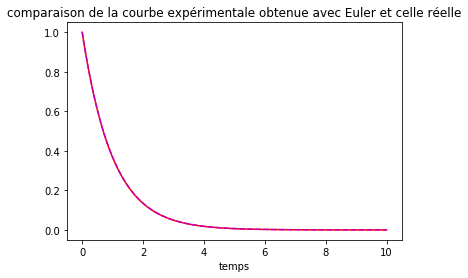

In [10]:
t0=0
tf=10
x0=1
dt=0.01 

def f1(x,t):
    return -x

def f(t):
    return np.exp(-t)    #On utilise les fonctions du module np pour accélérer les calculs 
start_time = time.time()
X,T=solve_euler_explicit(f1,x0,dt,tf,t0)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
abscisse=[t0]
ordonnée=[x0]
n=int((tf-t0)/dt)

for k in range (1,n+1):
    abscisse.append(abscisse[-1]+dt)     
    ordonnée.append(f(abscisse[-1]))

plt.plot(T,X, color='r')
plt.plot(abscisse,ordonnée,'m--')
plt.title('comparaison de la courbe expérimentale obtenue avec Euler et celle réelle')
plt.xlabel('temps')
plt.show()

Pour de manière générale étudier la convergence de la méthode, nous allonrs procéder comme suit: à chaque itération, on calcule l'erreur de troncature locale. Puis, on détermine le maximum de ces erreurs sur tout l'intervalle d'intégration. \
Enfin, pour démontrer le caractère linéaire de la convergence par rapport au pas de temps, on réitère le procédé pour un éventail de pas de temps. On obtient alors ces résultats pour l'équation $(E)$:

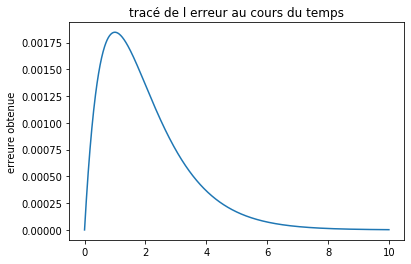

In [8]:
erreurs=[]
for k in range (len(T)):
    erreurs.append(abs(ordonnée[k]-X[k]))
erreur=max(erreurs)

erreurs_euler=erreurs
plt.plot(abscisse,erreurs)
plt.title('tracé de l erreur au cours du temps')
plt.ylabel('erreure obtenue')                     #pour un pas de temps fixé
plt.show()


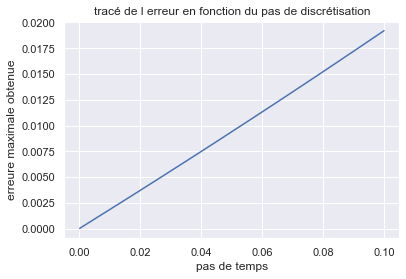

In [5]:
liste_dt=np.linspace(0.1,0.0001,1000)  # liste des pas de temps que nous souhaitons tester
liste_erreur=[]                       #liste des erreures ainsi obtenues

def fonction_reférence(t0,x0,dt,tf):
    """renvoie la liste des abscisses et celle des ordonnées pour la fonction f1 de t0 à tf discrétisé par dt"""
    abscisse=[t0]
    ordonnée=[f(t0)]
    n=int((tf-t0)/dt)
    for k in range (1,n+1):
        abscisse.append(abscisse[-1]+dt)
        ordonnée.append(f(abscisse[-1]))
    return abscisse,ordonnée
        
def erreur_max(ordonnée,X):
    """permet de rouver le maximum des écarts entre les élements des listes ordonnées et X"""      
    erreur=max(abs(X-ordonnée))
    return erreur

for elem in liste_dt:
    X,T=solve_euler_explicit(f1,x0,elem,tf)
    abscisse,ordonnée=fonction_reférence(t0,x0,elem,tf)
    abscisse=np.array(abscisse)
    ordonnée=np.array(ordonnée)
    X=np.array(X)
    T=np.array(T)
    liste_erreur.append(erreur_max(ordonnée,X))
    
plt.plot(liste_dt,liste_erreur)
plt.title('tracé de l erreur en fonction du pas de discrétisation')
plt.xlabel('pas de temps')
plt.ylabel('erreure maximale obtenue')
plt.show()

On caractérise ainsi bien le caractère convergent linéaire du schéma d'Euler d'ordre 1. \
On implémente maintenant la méthode dans le cas de fonctions à valeurs vectorielles, dans le cas de la résolution de l'équation d'un oscillateur amortie (qui est donc d'ordre 2):

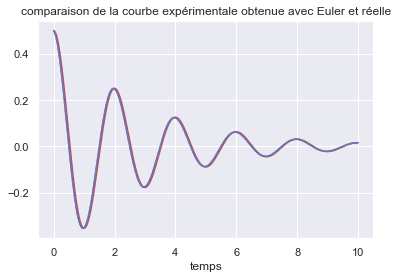

In [6]:
t0=0
tf=10
x0=[0.5,0]
dt=0.001


def solve_euler_explicit(f,x0,dt,tf,t0=0):
    X=np.array([x0])
    T=[t0]
    n=int((tf-t0)/dt)
    f=np.vectorize(f)
    for k in range(1,n+1):
        a=X[-1]+f1(X[-1],(t0+k*dt))*dt
        a=np.array([a])
        X=np.insert(X, len(X), a, axis=0)
        T.append(T[-1]+dt)
    return X, T


def f1(x,t):
    return np.array([x[1],(-0.7*x[1]-10*x[0])])

def f(t):
    return np.exp(-0.7*t/2)*(0.5*np.cos(6.285698/2*t))

abscisse=[t0]
ordonnée=[x0[0]]
n=int((tf-t0)/dt)

for k in range (1,n+1):
    abscisse.append(abscisse[-1]+dt)
    ordonnée.append(f(abscisse[-1]))

X,T=solve_euler_explicit(f1,x0,dt,tf)

plt.plot(T,X[:,0], color='r')
plt.plot(abscisse,ordonnée)
plt.plot(abscisse,ordonnée,'m--')
plt.title('comparaison de la courbe expérimentale obtenue avec Euler et réelle')
plt.xlabel('temps')
plt.show()

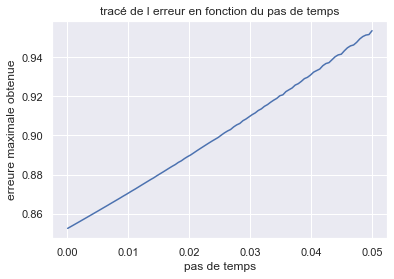

In [7]:

liste_dt=np.linspace(0.0001,0.05,100)
liste_erreur=[]

def fonction_reférence(t0,x0,dt):
    """renvoie la liste des abscisses et celle des ordonnées pour la fonction f1 de t0 à tf discrétisé par dt"""
    abscisse=np.array([t0])
    ordonnée=np.array([f(t0)])
    n=int((tf-t0)/dt)
    for k in range (1,n+1):
        abscisse=np.insert(abscisse, len(abscisse),np.array([abscisse[-1]+dt]),axis=0)
        ordonnée=np.insert(ordonnée,len(ordonnée), np.array([f(abscisse[-1])]),axis=0)
    return abscisse,ordonnée

        
def erreur_max(ordonnée,X):
    """permet de rouver le maximum des écarts entre les élements des listes ordonnées et X"""      
    erreur=max(abs(X[:,0]-ordonnée))
    return erreur

for elem in liste_dt:
    X,T=solve_euler_explicit(f1,x0,elem,tf)
    abscisse,ordonnée=fonction_reférence(t0,x0,elem)
    X=np.array(X)
    T=np.array(T)
    liste_erreur.append(erreur_max(ordonnée,X))
    
plt.plot(liste_dt,liste_erreur)
plt.title('tracé de l erreur en fonction du pas de temps')
plt.xlabel('pas de temps')
plt.ylabel('erreure maximale obtenue')
plt.show()

## Un exemple de schéma d'ordre 2: méthode de Heun
On implémente cette fois ci le schéma de Heun et on étudie sa convergence. On reprend exactement la même démarche que pour le schéma d'Euler.

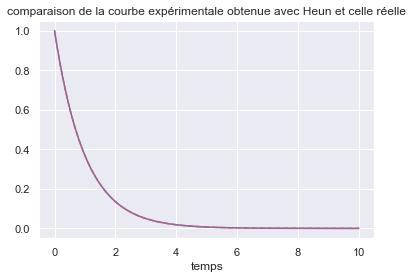

In [28]:
t0=0
tf=10
x0=1
dt=0.001

def solve_heun(f,x0,dt,tf,t0=0):
    X=[x0]
    T=[t0]
    n=int((tf-t0)/dt)
    for k in range(1,n+1):
        X.append(X[-1]+(f1(X[-1],t0+k*dt)+f1(X[-1]+f1(X[-1],t0+k*dt)*dt,t0+k*dt))*dt/2)
        T.append(T[-1]+dt)
    return X, T


def f1(x,t):
    return -x

def f(t):
    return np.exp(-t)

abscisse=[t0]
ordonnée=[x0]
n=int((tf-t0)/dt)

for k in range (1,n+1):
    abscisse.append(abscisse[-1]+dt)
    ordonnée.append(f(abscisse[-1]))

X,T=solve_heun(f1,x0,dt,tf)

plt.plot(T,X, color='r')
plt.plot(abscisse,ordonnée,'m--')
plt.title('comparaison de la courbe expérimentale obtenue avec Heun et celle réelle') #les deux courbes sont confondues
plt.xlabel('temps')
plt.show()

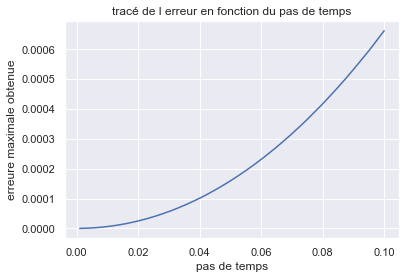

In [30]:
liste_dt=np.linspace(0.001,0.1,1000)  # liste des pas de temps que nous souhaitons tester
liste_erreur=[]                       #liste des érreures ainsi obtenues

def fonction_reférence(t0,x0,dt,tf):
    """renvoie la liste des abscisses et celle des ordonnées pour la fonction f1 de t0 à tf discrétisé par dt"""
    abscisse=[t0]
    ordonnée=[f(t0)]
    n=int((tf-t0)/dt)
    for k in range (1,n+1):
        abscisse.append(abscisse[-1]+dt)
        ordonnée.append(f(abscisse[-1]))
    return abscisse,ordonnée
        
def erreur_max(ordonnée,X):
    """permet de rouver le maximum des écarts entre les élements des listes ordonnées et X"""      
    erreur=max(abs(X-ordonnée))
    return erreur

for elem in liste_dt:
    X,T=solve_heun(f1,x0,elem,tf)
    abscisse,ordonnée=fonction_reférence(t0,x0,elem,tf)
    abscisse=np.array(abscisse)
    ordonnée=np.array(ordonnée)
    X=np.array(X)
    T=np.array(T)
    liste_erreur.append(erreur_max(ordonnée,X))
    
plt.plot(liste_dt,liste_erreur)
plt.title('tracé de l erreur en fonction du pas de temps')
plt.xlabel('pas de temps')
plt.ylabel('erreur maximale obtenue')
plt.show()

Cette courbe semble parabolique, ce qui caractériserait bien la convergence d'ordre 2 de la méthode de Heun. Mettons ce caractère en évidence:

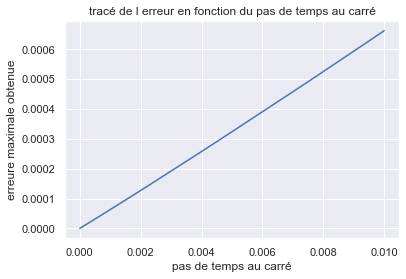

In [31]:
liste_dt_au_carré=[k**2 for k in liste_dt]

plt.plot(liste_dt_au_carré,liste_erreur)
plt.title('tracé de l erreur en fonction du pas de temps au carré')
plt.xlabel('pas de temps au carré')
plt.ylabel('erreure maximale obtenue')
plt.show()

On a donc bien illustré la convergence d'ordre 2 de la méthode. Pour un oscillateur harmonique non amorti cette fois-ci, on obtient: 

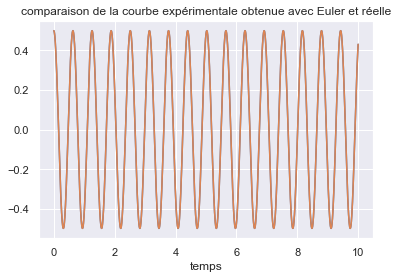

In [32]:
t0=0
tf=10
x0=[0.5,0]
dt=0.0005


def solve_heun(f,x0,dt,tf,t0=0):
    X=np.array([x0])
    T=[t0]
    n=int((tf-t0)/dt)
    f=np.vectorize(f)
    for k in range(1,n+1):
        a=X[-1]+(f1(X[-1],t0+k*dt)+f1(X[-1]+f1(X[-1],t0+k*dt)*dt,t0+k*dt))*dt/2
        a=np.array([a])
        X=np.insert(X, len(X), a, axis=0)
        T.append(T[-1]+dt)
    return X, T


def f1(x,t):
    return np.array([x[1],-100*x[0]])

def f(t):
    return 0.5*np.cos(10*t)

abscisse=[t0]
ordonnée=[x0[0]]
n=int((tf-t0)/dt)

for k in range (1,n+1):
    abscisse.append(abscisse[-1]+dt)
    ordonnée.append(f(abscisse[-1]))

X,T=solve_heun(f1,x0,dt,tf)

plt.plot(T,X[:,0])
plt.plot(abscisse,ordonnée)
plt.title('comparaison de la courbe expérimentale obtenue avec Euler et réelle')
plt.xlabel('temps')
plt.show()

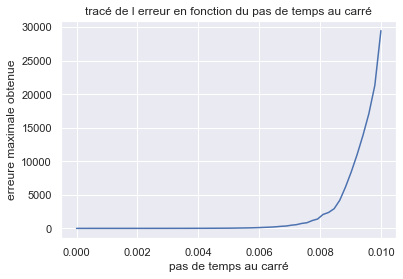

In [35]:
liste_dt=np.linspace(0.1,0.001,100)
liste_erreur=[]

def fonction_reférence(t0,x0,dt):
    """renvoie la liste des abscisses et celle des ordonnées pour la fonction f1 de t0 à tf discrétisé par dt"""
    abscisse=np.array([t0])
    ordonnée=np.array([f(t0)])
    n=int((tf-t0)/dt)
    for k in range (1,n+1):
        abscisse=np.insert(abscisse, len(abscisse),np.array([abscisse[-1]+dt]),axis=0)
        ordonnée=np.insert(ordonnée,len(ordonnée), np.array([f(abscisse[-1])]),axis=0)
    return abscisse,ordonnée
        
def erreur_max(ordonnée,X):
    """permet de rouver le maximum des écarts entre les élements des listes ordonnées et X"""      
    erreur=max(abs(X[:,0]-ordonnée))
    return erreur

for elem in liste_dt:
    X,T=solve_heun(f1,x0,elem,tf)
    abscisse,ordonnée=fonction_reférence(t0,x0,elem)
    X=np.array(X)
    T=np.array(T)
    liste_erreur.append(erreur_max(ordonnée,X))


liste_dt_au_carré=[k**2 for k in liste_dt]

plt.plot(liste_dt_au_carré,liste_erreur)
plt.title('tracé de l erreur en fonction du pas de temps au carré')
plt.xlabel('pas de temps au carré')      
plt.ylabel('erreure maximale obtenue')
plt.show()

Nous constatons un phénomène qui traduit les limites du pas de temps fixé: quand le pas de temps dépasse la période des oscillations théorique, l'erreur diverge: ici, l'analyse est possible car on connait la période théorique et on sait donc quel pas de temps choisir, mais cela est autrement plus compliqué pour des équations dont la solution théorique est inconnue. 
\
Nous avons donc implémenté deux schémas à pas fixés, qui ont l'avantage de la simplicité et d'une relative performance au niveau de l'ordre de convergence. Mais l'on peut optimiser le choix du pas de temps à chaque itération grâce à une optimisation d l'erreur, et donner lieu à des méthodes plus précises et performantes face à des fonctions peu régulières (ce qui n'est pas le cas des méthodes à pas fixén à moins de le prendre très petit).

# Adaptation du pas de temps

## Raisonnement mathématique
On cherche à adapter le pas de temps à chaque itération, cherchant à le prendre le plus grand possible tout en ne dépassant une erreur jugée acceptable $Tol_a$. Mais pour celà, il faut avoir  une idée de l'erreur commise... Cherchons en donc une expression simple $e^{j+1}$ dans le cas du schéma d'Euler explicite.
\
Supposons f de classe $C^1$ sur l'intervalle de résolution. Cela implique que $x$ est de classe $C^2$ sur le même intervalle.
$e^{j+1} = (x^j +  \int_{t_j}^{t_{j+1}} f(s, x(s)) \, \mathrm{d}s )-x^{j+1} = x(t_{j+1}) -x^{j+1}$
\ 
$x$ étant de classe $C^2$, un developpement de Taylor donne: 
$e^{j+1} = x(t_j)+\Delta t_j\dot{x}(t_j)+\frac{\Delta t_j^2.\ddot{x}(t_j)}{2}+o(\Delta t_j^2)-x^{j+1}$ avec $x^{j+1} = x^j+\Delta t_j\dot{x}(t_j) = x(t_j)+\Delta t_j\dot{x}(t_j)$ par schéma d'Euler et par définition de $e^{j+1}$
\
Puis, grâce à la formule des dérivées en chaines, nous pouvons écrire:
$e^{j+1} = \frac{(\Delta t_j)^2}{2}.(\frac{\partial f}{\partial x}(t_j, x(t_j))+f(t_j, x(t_j)).\frac{\partial f}{\partial y}(t_j, x(t_j))+ o(\Delta t_j^2))+o(\Delta t_j^2)$
\
Nous reconaissons alors le developpement de Taylor au premier ordre pour une fonction à deux variables entre $f(t_j, x(t_j))$ et $f(t_{j+1}, x^{j+1})$ car $x^{j+1}-x(t_j) = f(t_j, x(t_j))\Delta t_j$ par définition du schéma d'Euler explicite
\
De plus, par convergence du schéma d'Euler explicite, $x^{j+1}-x(t_j) = O(\Delta t_j)$

On écrit alors: $e^{j+1} = \frac{(\Delta t_j)^2}{2}.(\frac{f(t_{j+1}, x(t_{j+1}))-f(t_j, x(t_j))}{\Delta t_j}+O(\Delta t_j))$ puis $\mid\mid e^{j+1} \mid\mid = \frac{\Delta t_j\mid\mid f(t_{j+1}, x(t_{j+1})-f(t_j, x(t_j)) \mid\mid}{2} + O(\Delta t_j^3)$
\
\
Puis, on avait $x^j = x(t_j)$ puisque on supposait que le schéma était initialisé à $t_j$ avec la bonne valeur de x, ce qui implique que $e^{j+1} = \Delta t_j\eta^{j+1}$. \
La consistance du schéma d'Euler explicite donne $\mid\mid \eta^{j+1} \mid\mid ≤ c_s \Delta t_j$.  \
Il vient alors $\mid\mid e^{j+1} \mid\mid ≤ c_s(\Delta t_j)^2$ soit $e^{j+1} = O((\Delta t_j)^2)$
\
Nous savons que nous tolérons $e^{j+1} ≤ Tol_{abs}$. $e^{j+1}$ évoluant grossièrement comme $\Delta t_j^2$, nous pouvons adapter le pas de temps pour une erreur acceptable minimale: $\Delta t_{new} = \Delta t_j \sqrt{\frac{Tol_{abs}}{\mid\mid e^{j+1} \mid\mid}}$ (avec eventuellement une marge de sécurité).\
Notons que même si la formule est très épurée, il n'y a pas de magie: on aura besoin de "sauter" en avant à chaque itération en utilisant la formule du schéma d'Euler explicite, pour pouvoir calculer $e^{j+1}$. On aura donc une bien meilleure précision, certes, mais un temps de calcul plus long. 

## Un exemple de solveur à pas de temps adaptatif, explications et exemples

In [1]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (np.linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts += [t_next]
        xs += [x_next]
        t, ti, x = t_next, ti_next, x_next
    return ts, xs

Détaillons le fonctionnement de ce solveur: \
$ts$ et $xs$ sont les stacks qui contiennent les valeurs de temps et celles de x correspondantes qui seront renvoyées à la fin. 
Nous souhaitons en sortie d'algorithme avoir des listes echantillonnées à $dt_{max}$. Mais comment le faire alors que le pas de temps est par essence variable ? \
La solution est d'avancer par petits sauts de pas variables entre le dernier point stocké et le suivant, afin d'effectivement avoir des listes finales échantillonnées à un pas de temps fixe et contrôlé, tout en ayant une erreur de troncature locale minimale.\
On introduit deux variables de temps différentes: $t$ qui va parcourir tout l'intervalle de résolution, et $t_i$ qui, entre deux points de $ts$, sert d'horloge. $ti$ reste donc comprise entre 0 et $dt_{max}$, contrairement à $t$ qui évolue entre $t_0$ et $t_f$\
On commence avec un pas initial dt valant un dixième de $dt_{max}$. On "saute" en avant avec la formule d'Euler à pas de temps fixé pour calculer $e^{j+1}$, puis on "revient en arrière" avec $x_{back}$ et on calcule le nouveau pas de temps dt par la formule établie ci dessus.\
On garde quand même un contrôle sur ce dernier: si il est trop petit, on renvoie une erreur: cela  évite d'être cloué sur place en avançant de pas de temps infimes, ce qui entrainerait le non arrêt de l'algorithme. S'il dépasse $dt_{max}$, on le réduit également à $\frac{dt_{max}}{2}$: en effet, on peut échantilloner $ts$ tous les $dt_{max}$, donc il ne faut pas qu'on sorte de l'intervalle $[t_s[i],t_s[i]+dt_{max}]$.\
On avance donc comme ceci petit à petit jusqu'à arriver à la situation où l'on ne peut plus appliquer la méthode sans dépasser $t_i+dt_{max}$. On applique alors la formule du schéma d'Euler explicite, en prenant comme pas de temps le temps restant $dt2DT$  qui est par définition suffisement faible pour ne pas générer une erreur supérieure à $Tol_{abs}$. On a alors "comblé" le trou qui restait et on entre les valeurs de $t$ et $x$ dans $ts$ et $xs$


### Exemples et performances

Temps d execution : 0.039771080017089844 secondes ---


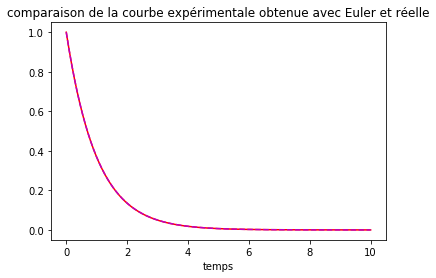

In [11]:
t0=0
tf=10
x0=1
dt=0.01 

def f1(t, x):
    return -x
start_time=time.time()
T,X=solve_ivp_euler_explicit_variable_step(f1,t0, x0, tf)
print("Temps d execution : %s secondes ---" % (time.time() - start_time))
plt.plot(T,X, color='r')

def f(t):
    return np.exp(-t)
abscisse=[t0]
ordonnée=[x0]
n=int((tf-t0)/dt)

for k in range (1,n+1):
    abscisse.append(abscisse[-1]+dt)     
    ordonnée.append(f(abscisse[-1]))
    
    
plt.plot(abscisse,ordonnée,'m--')
plt.title('comparaison de la courbe expérimentale obtenue avec Euler et réelle')
plt.xlabel('temps')
plt.show()

Les deux courbes sont confondues. Analysons maintenant la performance de la méthode, c'est à dire l'écart entre l'erreur maximale sur l'intervalle d'intégration d'un schéma à pas de temps fixé et celui-ci: 

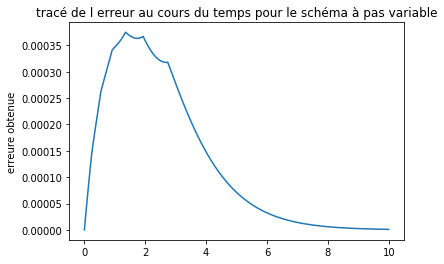

In [5]:

erreurs=[]
for k in range (len(T)):
    erreurs.append(abs(ordonnée[k]-X[k]))
    
plt.plot(abscisse,erreurs)
plt.title('tracé de l erreur au cours du temps pour le schéma à pas variable')
plt.ylabel('erreure obtenue')                     #pour un pas de temps fixé
plt.show()


Nous constatons donc que, pour dt_max=0.01, l'erreur de troncature maximale de ce schéma est 5 fois plus faible que pour le schéma d'Euler explicite à pas fixé. On a donc une réelle hausse de performances (sachant que la fonction solution est assez lisse donc propice au schéma d'euler à pas fixé).  \
Mais celà ne va pas sas un coût en temps: d'après les résultats de la bibliothèque time, un euler à pas variable s'exécute, pour l'équation $(E)$ entre 0 et 10, en 0.0398s environ contre une exécution quasi instantanée (0.0s pour time) pour le schéma à pas de temps fixé. Pour des intervalle d'intégrations plus longs ou un dt_max plus petit, on aura donc un réel écart qui se creusera entre les deux méthodes: la précision relative augmentera considérablement pour le schéma à temps variable, au détriment du temps d'exécution.